In [1]:
import matplotlib
#get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import cv2
import math
from operator import itemgetter
from dxfwrite import DXFEngine as dxf
from dxfwrite.dimlines import dimstyles, LinearDimension ,RadialDimension


print("please wait a minute :D ")
# Number of colors #
Red=1
Yellow=2
Green=3
Labny=4
Blue=5
Foshia=6
White=7
theta=0
name=""

factor=1
dimension=0

horizontal=[]
vertical=[]
general_line=[]

#image name


list_circles=[]



minx=0
maxy=0




######functions

r=15 #how much do we want to approximate near points to be the same



def same(arr1,arr2):
    r=18
    if abs(arr1[0]-arr2[0])<r and abs(arr1[1]-arr2[1])<r and abs(arr1[2]-arr2[2])<r and abs(arr1[3]-arr2[3])<r:
        return True
    else :
        return False
    
def samep(n1,n2):
    r=15
    if abs(n1-n2)<r:
        return True
    else:
        return False
    
    
def im_in(n, array):
    r=15
    for i in array:
        if abs(n-i)<r:
            return True
        
    return False


def connect_vertical_lines(vertical_lines):
    maxy=0
    #print('e3rd', vertical_lines)
    ShouldRemove = []
    vertical_end=[]
    for i in range(0,len(vertical_lines)):
        FlagOfRepetition = 0
        length = len(vertical_lines)
        maxy=0
        extention_flag=0
        
        for j in range(0,len(vertical_lines)):
            if(i==j):
                continue
                    
            if vertical_lines[i][0] == vertical_lines[j][0]:  # They have the same x #

                if vertical_lines[i][1] <= vertical_lines[j][1] and vertical_lines[i][3] >= vertical_lines[j][3]:  # i involve j #
                    #print(str(vertical_lines[i]) + " involve " + str(vertical_lines[j]),i)
                    ShouldRemove.append(vertical_lines[j])     # we should delete j

                elif vertical_lines[i][1] >= vertical_lines[j][1] and vertical_lines[i][3] <= vertical_lines[j][3]:  # j involve i #4
                    #print(str(vertical_lines[j]) + " involve " + str(vertical_lines[i]),i)
                    ShouldRemove.append(vertical_lines[i])    # we should delete i
                
                elif vertical_lines[i][1] <= vertical_lines[j][1] and vertical_lines[i][3] >= vertical_lines[j][1]:
                    extention_flag=1
                    #print('case',vertical_lines[i],vertical_lines[j])
                    ShouldRemove.append(vertical_lines[j])
                    if vertical_lines[j][3]>=maxy:
                        maxy=vertical_lines[j][3]
                        
                        
        if extention_flag==1: 
            vertical_end.append((vertical_lines[i],maxy))
            #print('appedned',vertical_lines[i],maxy)
                    
    output=[]                
    for i in range(len(vertical_lines)):
        flag=0
        for j in range(len(ShouldRemove)):
            if(vertical_lines[i][0]==ShouldRemove[j][0] and vertical_lines[i][1]==ShouldRemove[j][1] and
              vertical_lines[i][2]==ShouldRemove[j][2] and vertical_lines[i][3]==ShouldRemove[j][3]):
                flag=1
                break
                
        if(flag==0):
            #print('3mlna append',len(vertical_end))
            for k in range(len(vertical_end)):
                #print('elmafrood',vertical_lines[i],vertical_end[k][0])
                if(vertical_lines[i][0]==vertical_end[k][0][0] and vertical_lines[i][1]==vertical_end[k][0][1] and
                  vertical_lines[i][2]==vertical_end[k][0][2] and vertical_lines[i][3]==vertical_end[k][0][3]):
                    vertical_lines[i][3]=vertical_end[k][1]
                    #print('fe3ly',i,vertical_end[k][1])
            output.append(vertical_lines[i])

    return output
            
def connect_horizontal_lines(horizontal_lines):
    maxx=0
    ShouldRemove = []
    horizontal_end=[]
    for i in range(0,len(horizontal_lines)):
        FlagOfRepetition = 0
        length = len(horizontal_lines)
        maxx=0
        extention_flag=0
        
        for j in range(0,len(horizontal_lines)):
            
            if(i==j):
                continue

            if horizontal_lines[i][1] == horizontal_lines[j][1]:  # They have the same y #

                if horizontal_lines[i][0] <= horizontal_lines[j][0] and horizontal_lines[i][2] >= horizontal_lines[j][2]:  # i involve j #
                    ShouldRemove.append(horizontal_lines[j])     # we should delete j

                elif horizontal_lines[i][0] >= horizontal_lines[j][0] and horizontal_lines[i][2] <= horizontal_lines[j][2]:  # j involve i #4
                    ShouldRemove.append(horizontal_lines[i])    # we should delete i
                    
                elif horizontal_lines[i][0] <= horizontal_lines[j][0] and horizontal_lines[i][2] >= horizontal_lines[j][0]:
                    extention_flag=1
                    ShouldRemove.append(horizontal_lines[j])
                    if horizontal_lines[j][2]>=maxx:
                        maxx=horizontal_lines[j][2]
                    
        if extention_flag==1: 
            horizontal_end.append((horizontal_lines[i],maxx))
            #print('appedned',horizontal_lines[i],maxx)
                    
    output=[]                
    for i in range(len(horizontal_lines)):
        flag=0
        for j in range(len(ShouldRemove)):
            if(horizontal_lines[i][0]==ShouldRemove[j][0] and horizontal_lines[i][1]==ShouldRemove[j][1] and
              horizontal_lines[i][2]==ShouldRemove[j][2] and horizontal_lines[i][3]==ShouldRemove[j][3]):
                flag=1
                break
                
        if(flag==0):
            for k in range(len(horizontal_end)):
                #print('elmafrood',horizontal_lines[i],horizontal_end[k][0])
                if(horizontal_lines[i][0]==horizontal_end[k][0][0] and horizontal_lines[i][1]==horizontal_end[k][0][1] and
                  horizontal_lines[i][2]==horizontal_end[k][0][2] and horizontal_lines[i][3]==horizontal_end[k][0][3]):
                    horizontal_lines[i][2]=horizontal_end[k][1]
            output.append(horizontal_lines[i])

    return output


    
############################################ FUNCTION DETECT LINES
def detect_lines(gray):
    global  horizontal
    global vertical
    global general_line
    global minx
    global maxy
    
    #creating a corresponding white image
    
    white = np.zeros_like(gray)                                                       
    white.fill(255)
    pure_lines = white
    
    
    #detect edge
    #di = cv2.dilate(gray,cv2.getStructuringElement(cv2.MORPH_RECT,(7,7)),iterations = 1)
    #edges=di-gray
    edges = cv2.Canny(gray, 50, 100)    # get the edges

    #convert to binary image
    ret,edges = cv2.threshold(edges,40,255,cv2.THRESH_BINARY)



    kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(7,7))
    edges = cv2.morphologyEx(edges,cv2.MORPH_CLOSE,kernel)

    #edges = cv2.dilate(edges,cv2.getStructuringElement(cv2.MORPH_RECT,(3,3)),iterations = 1)
    print('edges before houghlines')
    plt.imshow(edges, cmap='gray')
    plt.show()
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 85, minLineLength=15, maxLineGap=0)       # Detect lines


    ####################################################################################################################

    new_lines=[]
    try:
        for i in range(len(lines)):
            flag=0
            if (i!=0):
                for j in range(i):
                        if same(lines[i][0],lines[j][0]):
                            flag=1
                            continue
            if(flag==0):
                line=[]
                line.append(lines[i][0][0])
                line.append(lines[i][0][1])
                line.append(lines[i][0][2])
                line.append(lines[i][0][3])
                new_lines.append(line)
    
    except:
        #print('no lines found')
        return pure_lines
    
    xs=[]
    ys=[]

    for i in new_lines:
        xs.append(i[0])
        xs.append(i[2])
        ys.append(i[1])
        ys.append(i[3])

    # sorting #
    sorted_x=sorted(xs)
    sorted_y=sorted(ys)


    special_x=[]
    special_y=[]


    for i in sorted_x:
        if not(im_in(i, special_x)):
            special_x.append(i)

    for i in sorted_y:
        if not(im_in(i, special_y)):
            special_y.append(i)

    #print(special_x,'yes')


    ######################################################################################################################

    for i in range(len(new_lines)):
        for j in range(len(special_x)):
            if(abs(new_lines[i][0]-special_x[j])<r):
                new_lines[i][0]=special_x[j]
                break

        for j in range(len(special_x)):
            if(abs(new_lines[i][2]-special_x[j])<r):
                new_lines[i][2]=special_x[j]
                break
        for j in range(len(special_y)):
            if(abs(new_lines[i][1]-special_y[j])<r):
                new_lines[i][1]=special_y[j]
                break

        for j in range(len(special_y)):
            if(abs(new_lines[i][3]-special_y[j])<r):
                new_lines[i][3]=special_y[j]
                break        


    for i in range(len(new_lines)):   
        x1, y1, x2, y2 = new_lines[i]
        cv2.line(white, (x1, y1), (x2, y2), (0, 0, 0), 3)
    #x1, y1, x2, y2 = new_lines[8]
    #cv2.line(white, (x1, y1), (x2, y2), (255, 0, 0), 3)
    #for i in new_lines:
        #print(i,'here')

    print('after detecting lines')
    plt.imshow(white)
    plt.show()

    pure_lines = white


    #FOR FARAG's HAPPINESS  ( Thank You ^^ )
    # Getting the start point #
    minx=min(special_x)
    maxy=max(special_y)

    #print(new_lines, 'all lines')
    
    
    
    for i in range(len(new_lines)):
        
        
        new_lines[i][0]-=minx
        new_lines[i][2]-=minx

        new_lines[i][1]=maxy-new_lines[i][1]
        new_lines[i][3]=maxy-new_lines[i][3]



    vertical=[]
    horizontal=[]
    general_line=[]
    
    vertical_1=[]
    horizontal_1=[]
    general_line_1=[]
    
    for i in new_lines:
        #print("dimension",dimension)
        i.append(math.sqrt((i[0]-i[2])**2+(i[1]-i[3])**2))     ################## i will change it to dimension #
        if i[0]==i[2]:                  # To Extract Vertical lines
            vertical_1.append(i)
        elif i[1]==i[3]:
            horizontal_1.append(i)        # To Extract Horizontal lines
        else:
            general_line_1.append(i)      # To Extract General lines

    vertical_1=connect_vertical_lines(vertical_1)        # ( Connect Vertical lines first ) #
    #print("ssdsafsdaf",vertical_1)
    horizontal_1=connect_horizontal_lines(horizontal_1)
    

    for i in vertical_1:
        vertical.append(i)

    for i in horizontal_1:
        horizontal.append(i)

        
    for i in general_line_1:
        general_line.append(i)
    
    return pure_lines
    #horizontal = np.array(horizontal)
    #vertical = np.array(vertical_2)

    # print("H",horizontal,"H")
    # print("V",vertical,"V")
    # print("G",general_line,"G")
    # Show result     

    
    
    
    
    
    
    
    
    


print('################### Please Wait a moment (^_^) ################### \n')
def det_circles(img,deep=0):
    
    
    img = cv2.medianBlur(img,5)

    circles=[]
    if deep==0:
        try:
            circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,
                    1,60,param1=50, param2=30, minRadius=0,maxRadius=0)
            circles = np.uint16(np.around(circles))
        except:
            pass
    else:
        try:
            circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,
                    1,60,param1=30, param2=15, minRadius=0,maxRadius=0)
            circles = np.uint16(np.around(circles))
        except:
            pass
    return circles





class shapes:
    
    global factor
    drawing = ''

    def __init__(self,fileName):
        self.drawing = dxf.drawing(fileName + '.dxf')



    def text(self,text,x,y,color = Foshia):
        text = dxf.text(text, (x, y), height=2, rotation=0)
        text['layer'] = 'TEXT'
        text['color'] = color
        self.drawing.add(text)
        self.drawing.save()

    def line_with_NO_dims(self,x1, y1, x2, y2,color = White):
        line = dxf.line((x1, y1), (x2, y2))
        line['color'] = color
        self.drawing.add(line)
        self.drawing.save()

    def Horizontal_line_with_under_dims(self,x1, y1, x2, y2,length,color = White):
        hh = (length/18)
        if hh < 0.4:
            hh = 0.4
        #print("Length of H.L.Under",length)
        line = dxf.line((x1, y1), (x2, y2))
        line['color'] = color
        self.drawing.add(line)

        dimstyles.setup(self.drawing)

        points = [(x1, y1 + length/100), (x2, y1 +  length/100)]  # mn hna bt7dd x bta3 al point   # al y = height of blue line

        dimstyles.new("arrow", tick="DIMTICK_ARROW",scale=1,height = hh+0.2, tick2x=True, dimlineext=0.,tickfactor=length/5)
        #dimlineex: incraese the length of line
        
        
        
        # The angle control the slope of line
        Theta = math.atan((y1 - y2) / (x1 - x2))
        Theta = math.degrees(Theta)
        self.drawing.add(
            LinearDimension((10, y1 -  length/10), points, dimstyle='arrow', angle=Theta))  # mn hna bt7dd y bta3 al point
        # drawing.set_text(1, 'CATCH')
        self.drawing.save()

    def Horizontal_line_with_upper_dims(self,x1, y1, x2, y2,length,color = White):
        hh = (length/18)
        if hh < 0.4:
            hh = 0.4
        #print("Length of H.L.Upper",length)
        line = dxf.line((x1, y1), (x2, y2))
        line['color'] = color
        self.drawing.add(line)

        dimstyles.setup(self.drawing)

        points = [(x1, y1 ), (x2, y1 )]  # mn hna bt7dd x bta3 al point   # al y = height of blue line

        dimstyles.new("arrow", tick="DIMTICK_ARROW",scale=1,height = hh+0.2, tick2x=True, dimlineext=0.,tickfactor=length/5)


        # The angle control the slope of line
        Theta = math.atan((y1 - y2) / (x1 - x2))
        Theta = math.degrees(Theta)
        self.drawing.add(
            LinearDimension((10, y1 + length/10), points, dimstyle='arrow', angle=Theta))  # mn hna bt7dd y bta3 al point
        # drawing.set_text(1, 'CATCH')
        self.drawing.save()

    def vertical_line_with_left_dims(self,x1, y1, x2, y2,length,color = White):
        hh = (length/18)
        if hh < 0.4:
            hh = 0.4
        #print("Length of V.L.Left", length)
        line = dxf.line((x1, y1), (x2, y2))
        line['color'] = color
        self.drawing.add(line)

        dimstyles.setup(self.drawing)

        points = [(x1  , y1), (x1 , y2)]  # mn hna bt7dd y bta3 al point   # al x = height of blue line

        dimstyles.new("arrow", tick="DIMTICK_ARROW",scale=1,height = hh+0.2, tick2x=True, dimlineext=0.,tickfactor=length/5)


        self.drawing.add(
            LinearDimension((x1 - 2 , 7), points, dimstyle='arrow', angle=90))  # mn hna bt7dd x bta3 al point

        self.drawing.save()

    def vertical_line_with_right_dims(self,x1, y1, x2, y2,length,color = White):
        hh = (length/18)
        if hh < 0.4:
            hh = 0.4
        #print("Length of V.L.Right", length)
        line = dxf.line((x1, y1), (x2, y2))
        line['color'] = color
        self.drawing.add(line)

        dimstyles.setup(self.drawing)

        points = [(x1 , y1), (x1 , y2)]  # mn hna bt7dd y bta3 al point   # al x = height of blue line

        dimstyles.new("arrow",tick="DIMTICK_ARROW",scale=1,height = hh+0.2 , tick2x=True, dimlineext=0.
                      ,tickfactor=length/5)


        self.drawing.add(
            LinearDimension((x1 + (length/10) , 7), points, dimstyle='arrow', angle=90))  # mn hna bt7dd x bta3 al point

        self.drawing.save()

    def circle_with_NO_dims(self, r, x, y,color = White):
        circle = dxf.circle(r, (x, y))
        circle['color'] = color
        self.drawing.add(circle)

        self.drawing.save()

    def circle_with_dims(self,r, x, y,color = White):
        global theta
        
        circle = dxf.circle(r, (x, y))
        circle['color'] = color
        self.drawing.add(circle)

        dimstyles.setup(self.drawing)
        dimstyles.new("radius",scale=1, height=r/4, prefix='R=',tickfactor=r/1.5)

        self.drawing.add(RadialDimension((x, y), (x+r*np.sin(theta), y + r*np.cos(theta)), dimstyle='radius'))
        self.drawing.save()
        theta=(theta+0.2)%6

    def arc(self,r,x,y,Theta1,Theta2,color = White):
        arc = dxf.arc(r, (x, y), Theta1, Theta2)
        arc['color'] = color
        self.drawing.add(arc)
        self.drawing.save()

    def rectangle(self,x,y,width,height,color = White):
        # (x,y) is the top right point of the rectangle

        s.line_with_NO_dims(x-width, y-height, x, y-height,color)
        s.line_with_NO_dims(x, y-height, x, y,color)
        s.line_with_NO_dims(x-width, y-height, x-width, y,color)
        s.line_with_NO_dims(x-width, y, x, y,color)

    def dashed_line(self,x1,y1,x2,y2,color = Red):  # The dashed line should be vertical or horizontal only
        if x1 == x2:                            # vertical dashed line
            array = np.arange(y1, y2, 0.001)
            count = 0
            for y in array:
                if count <= 100:
                    point = dxf.point((x1,y))
                    point['color'] = color
                    self.drawing.add(point)
                    count = count + 1
                else:
                    if count == 160:
                        count = 0
                    else:
                        count = count + 1

        elif y1 == y2:                          # Horizontal dashed line
            array = np.arange(x1, x2, 0.001)
            count = 0
            for x in array:
                if count <= 100:
                    point = dxf.point((x, y1))
                    point['color'] = color
                    self.drawing.add(point)
                    count = count + 1
                else:
                    if count == 160:
                        count = 0
                    else:
                        count = count + 1
        self.drawing.save()
        
    def Determine_UpperOrUnder(self,y,index,factor):
        #print("NewLength=",horizontal[index][4]/factor)
        Flag_there_is_a_line_above_me = 0
        #print("y",y)
        for i in horizontal:
            #print("i[1]",i[1])
            if  i[1] > y:
                Flag_there_is_a_line_above_me = 1
                break
        
        #print("Flag",Flag_there_is_a_line_above_me)
        if Flag_there_is_a_line_above_me == 0:        
            self.Horizontal_line_with_upper_dims(horizontal[index][0]/factor, horizontal[index][1]/factor,
                       horizontal[index][2]/factor, horizontal[index][3]/factor,horizontal[index][4]/factor,Green)
        else:
            self.Horizontal_line_with_under_dims(horizontal[index][0]/factor, horizontal[index][1]/factor,
                           horizontal[index][2]/factor, horizontal[index][3]/factor,horizontal[index][4]/factor,Green)
                
    def Determine_RightOrLeft(self,x,index,factor):
        #print("NewLength=", vertical[index][4] / factor)
        Flag_there_is_a_line_right_me = 0
        
        for i in vertical:
            if  i[0] > x:
                Flag_there_is_a_line_right_me = 1
                break
               
        if Flag_there_is_a_line_right_me == 0:        
            self.vertical_line_with_right_dims(vertical[index][0]/factor, vertical[index][1]/factor,
                       vertical[index][2]/factor, vertical[index][3]/factor,vertical[index][4]/factor,Green)
        else:
            self.vertical_line_with_left_dims(vertical[index][0]/factor, vertical[index][1]/factor,
                           vertical[index][2]/factor, vertical[index][3]/factor,vertical[index][4]/factor,Green)


please wait a minute :D 
################### Please Wait a moment (^_^) ################### 



In [2]:

def draw():   
    

    test = cv2.imread(name)     # Reading the original image


    gray = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)                # convert fron BGR to Gray


    global horizontal
    global vertical
    global general_line

    pure_lines = detect_lines(gray)

    # #print('NOWWWWWW')
    # plt.imshow(pure_lines)
    # plt.show()

    # vertical, horizontal ,general_line, pure_lines = detect_lines(pure_lines, white)

    # print('NOWWWWWW')
    # plt.imshow(pure_lines)
    # plt.show()



    ##################################################################################################################

    #print('######################################################2 \n')
    test = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)                # convert fron BGR to Gray


    test = cv2.Canny(test, 100, 150)                           # get the edges

    #convert to binary image
    ret,test = cv2.threshold(test,40,255,cv2.THRESH_BINARY)

    test = cv2.dilate(test,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7)),iterations = 1)
    test = cv2.erode(test,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7)),iterations = 1)   
    #ret,test = cv2.threshold(test,70,255,cv2.THRESH_BINARY)

    test=cv2.bitwise_not(test)





    ret,pure_lines = cv2.threshold(pure_lines,40,255,cv2.THRESH_BINARY)

    white2=cv2.bitwise_not(pure_lines)

    # print('test')
    # plt.imshow(test)
    # plt.show()

    #print('lines after dilation')
    white2 = cv2.dilate(white2,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(13,13)),iterations = 1)
    # plt.imshow(white2)
    # plt.show()

    #white2 = cv2.erode(white2,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9)),iterations = 1)


    only_lines=cv2.bitwise_not(white2)


    test=cv2.bitwise_not(test)
    output=cv2.subtract(test,white2)
    test=cv2.bitwise_not(test)

    output = cv2.dilate(output,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7)),iterations = 1)

    output=cv2.bitwise_not(output)

    # print('output circles only to be detected')
    # plt.imshow(output)
    # plt.show()

    
    

    #print('######################################################4 \n')

    kernal=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))




    #output=cv2.imread('circles1.png')


    only_circles = output
    deep=0 #the last iteration try to find circles more deeply

    while(1):

        gray = output

        # print('a circle to be detected')
        # plt.imshow(gray,cmap='gray')
        # plt.show()

        circles=det_circles(gray,deep)
        #print(circles)

        #deep=0 #deep = 0 again to check if it one a

        try:
            if(len(circles)==0  or circles[0][0][2]==0):
                #print('try')
                break
        except:
            deep=1
            #print('except')


        if(deep==1): #try to deep search for circles
            circles=det_circles(gray,deep)
            #print(circles)

            try:
                if(len(circles)==0  or circles[0][0][2]==0):
                    #print('try')
                    break
            except:
                deep=1
                #print('except again')
                break
            #continue

        #print('circles after break', circles)
        for i in circles[0]:
            #print('iiiiiiiiiiii',i)

            circle=[]
            circle.append(i[0])
            circle.append(i[1])
            circle.append(i[2])

            list_circles.append(circle)

        #creating a corresponding white image
        white_new = np.zeros_like(test)                                                       
        white_new.fill(255)

        for i in circles[0,:4]:
            #print('style',i[0],i[1],i[2])
            cv2.circle(white_new,(i[0],i[1]),i[2],(0,0,0),2)

        test=cv2.bitwise_not(output)
        white2=cv2.bitwise_not(white_new)

        test = cv2.erode(test,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)),iterations = 1)
        white2 = cv2.dilate(white2,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(19,19)),iterations = 1)

        output = cv2.subtract(test , white2)

        # print('this')
        # plt.imshow(test)
        # plt.show()
        #
        # print('minus this')
        # plt.imshow(white2)
        # plt.show()
        #
        #
        # plt.imshow(output)
        # plt.show()


        output = cv2.dilate(output,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)),iterations = 1)

        output=cv2.bitwise_not(output)

        #print('after removing the first circle')


    # output = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
    # ret,output = cv2.threshold(output,100,255,cv2.THRESH_BINARY)

    # plt.imshow(output, cmap='gray')
    # plt.show()

    # circles2=det_circles(output)
    # print('2222',circles2)
    # list_circles.append(circles2)


    #print('list', list_circles)








    #gray = cv2.imread(name,0)
    #only_lines = cv2.cvtColor(only_lines, cv2.COLOR_BGR2GRAY)                # convert fron BGR to Gray
    #ret,gray = cv2.threshold(gray,40,255,cv2.THRESH_BINARY)
    #ret,only_lines = cv2.threshold(only_lines,40,255,cv2.THRESH_BINARY)

    #make the lines thinner
    #only_lines = cv2.dilate(only_lines,cv2.getStructuringElement(cv2.MORPH_RECT,(5,5)),iterations = 1)

    #print('shape gray', gray.shape)
    #print('only_lines gray', only_lines.shape)


    #plt.imshow(gray,cmap='gray')
    #plt.show()

    #plt.imshow(only_lines,cmap='gray')
    #plt.show()


    #gray=cv2.subtract(only_lines, gray)
    #gray = cv2.dilate(gray,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(21,21)),iterations = 1)

    gray = only_circles                # convert fron BGR to Gray
    gray = cv2.erode(gray,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(17,17)),iterations = 1)

    # print('gray without lines')
    # plt.imshow(gray,cmap='gray')
    # plt.show()
    #gray=cv2.bitwise_not(gray)

    for j in range(len(list_circles)):

        #print('circle number', j)
        Find_Right_point = 0
        Find_Left_point = 0
        Find_Up_point = 0
        Find_Down_point = 0

        x = list_circles[j][0]
        y = list_circles[j][1]
        r = list_circles[j][2] 

        black = 200 #if the pixel value is less than this,, consider it black

        for i in range (0,12):
            for k in range(25):
                index = x +r-5+i
                value_1 = gray[y+k][index]
                value_2 = gray[y-k][index]
                #print('right',value_1,value_2,h)
                if (black > value_1 or black > value_2) and Find_Right_point == 0 :
                    Find_Right_point = 1
                    #print('Find_Right_point')

                index = x - r - 5 + i
                value_1 = gray[y+k][index]
                value_2 = gray[y-k][index]
                #print('left',value_1,value_2,h)
                if (black > value_1 or black > value_2) and Find_Left_point == 0:
                    Find_Left_point = 1
                    #print('Find_Left_point')

                index = y+r-5+i
                value_1 = gray[index][x-k]
                value_2 = gray[index][x+k]
                #print('down',value_1,value_2,h)
                if  (black > value_1 or black > value_2) and Find_Down_point == 0:
                    Find_Down_point = 1
                    #print('Find_Down_point')

                index = y - r - 5 + i
                value_1 = gray[index][x-k]
                value_2 = gray[index][x+k]
                #print('up',value_1,value_2)
                if (black > value_1 or black > value_2) and Find_Up_point == 0 :
                    Find_Up_point = 1
                    #print('Find_Up_point')

        Decision = str(Find_Right_point)+str(Find_Left_point)+str(Find_Up_point)+str(Find_Down_point)
        #print(Decision)
        if Decision == '1011':
            list_circles[j].append('right half circle')
        elif Decision == '0111':
            list_circles[j].append('left half circle')
        elif Decision == '1110':
            list_circles[j].append('up half circle')
        elif Decision == '1101':
            list_circles[j].append('down half circle')
        else:
            #print(Decision)
            list_circles[j].append('full circle')



  #  for j in list_circles:
        #for i in range(3):
        # #Getting The Centre
        # x = i[0]
        # y = i[1]
        #
        # #Getting The Radius
        # r = i[2]
        #draw the outer circle
        #cv2.circle(white,(j[0],j[1]),j[2],(0,0,0),2)
        #draw the center of the circle
        #cv2.circle(white,(i[0],i[1]),2,(0,0,255),3)
        #print (j[2], 'list of circles')



    for j in range(len(list_circles)):
        list_circles[j][0] -= minx
        list_circles[j][1]  = maxy-list_circles[j][1]


        #plt.imshow(white,cmap='gray')

In [3]:
def main_prog():
    
    global horizontal
    global vertical
    global general_line
    
    
    
    s = shapes(name)
    #s.circle_with_dims(2,3,5,Blue)


     #Ex1: Tesing all shpes I have till Now #

    # s.line_with_NO_dims(1,1,2,2)
    # s.Horizontal_line_with_under_dims(2,3,5,3)
    # s.Horizontal_line_with_upper_dims(2,5,5,5)
    # s.vertical_line_with_left_dims(10,2,10,8,Blue)
    # s.vertical_line_with_right_dims(13,2,13,8)
    # s.circle_with_NO_dims(2,17,6.5,Yellow)
    # s.circle_with_dims(2,17,2)
    # s.arc(1.2,5.6,2.4,30.5,90.9)




     #EX2: trying to draw the proposal shape #

    global factor 
    factor = distancelist[0]/dimension
    #print(factor)
    # s.text("Elevation",6.7,-0.5)
    #[[57, 58, 318, 58, 261.0], [57, 145, 318, 145, 261.0], [0, 0, 385, 0, 385.0]]
    horizontal=sorted(horizontal, key = itemgetter(4))    # sortred by length
 #  HORIZONTAL=sorted(HORIZONTAL, key = itemgetter(1))    # sorted by ( y )


    if(len(horizontal)==1):
        # print("ok1")
        s.Horizontal_line_with_under_dims(horizontal[0][0]/factor, horizontal[0][1]/factor, horizontal[0][2]/factor, horizontal[0][3]/factor,horizontal[0][4]/factor,Green)

    if(len(horizontal)>1 and (horizontal[0][4]!=horizontal[1][4])):
        # print("ok2")
        s.Determine_UpperOrUnder(horizontal[0][1],0,factor)

    for i in range (1,len(horizontal)):

        if(horizontal[i][4]==horizontal[i-1][4]):    # length of i = length of  i-1 
            if(horizontal[i][1]<horizontal[i-1][1]): #  i under i-1
                # print("ok3")
                s.Horizontal_line_with_under_dims(horizontal[i][0]/factor, horizontal[i][1]/factor, horizontal[i][2]/factor, horizontal[i][3]/factor,horizontal[i][4]/factor,Green)
                s.line_with_NO_dims(horizontal[i-1][0]/factor, horizontal[i-1][1]/factor, horizontal[i-1][2]/factor, horizontal[i-1][3]/factor,Green)
            else:                                    # i upper i-1
                # print("ok4")
                s.line_with_NO_dims(horizontal[i][0]/factor, horizontal[i][1]/factor, horizontal[i][2]/factor, horizontal[i][3]/factor,Green)
                s.Horizontal_line_with_under_dims(horizontal[i-1][0]/factor, horizontal[i-1][1]/factor, horizontal[i-1][2]/factor, horizontal[i-1][3]/factor,horizontal[i-1][4]/factor,Green)
        elif(i==len(horizontal)-1):
             # print("ok5")
             s.Determine_UpperOrUnder(horizontal[i][1],i,factor)

        elif(horizontal[i][4]!=horizontal[i-1][4] and horizontal[i][4]!=horizontal[i+1][4]):
            # print("ok6")
            s.Determine_UpperOrUnder(horizontal[i][1],i,factor)



    vertical=sorted(vertical, key = itemgetter(4))

    if(len(vertical)==1):
        s.vertical_line_with_right_dims(vertical[0][0]/factor, vertical[0][1]/factor, vertical[0][2]/factor, vertical[0][3]/factor,vertical[0][4]/factor,Green)
    if(len(vertical)>1 and (vertical[0][4]!=vertical[1][4])):
        s.Determine_RightOrLeft(vertical[0][0],0,factor)

    for i in range (1,len(vertical)):
        if(vertical[i][4]==vertical[i-1][4]):     # length of i = length of  i-1 
            if(vertical[i][0]>vertical[i-1][0]):  #  i right i-1  
                s.vertical_line_with_right_dims(vertical[i][0]/factor, vertical[i][1]/factor, vertical[i][2]/factor, vertical[i][3]/factor,vertical[i][4]/factor,Green)
                s.line_with_NO_dims(vertical[i-1][0]/factor, vertical[i-1][1]/factor, vertical[i-1][2]/factor, vertical[i-1][3]/factor,Green)
            else:
                s.line_with_NO_dims(vertical[i][0]/factor, vertical[i][1]/factor, vertical[i][2]/factor, vertical[i][3]/factor,Green)
                s.vertical_line_with_right_dims(vertical[i-1][0]/factor, vertical[i-1][1]/factor, vertical[i-1][2]/factor, vertical[i-1][3]/factor,vertical[i-1][4]/factor,Green)
        elif(i==len(vertical)-1):
            s.Determine_RightOrLeft(vertical[i][0],i,factor)

        elif(vertical[i][4]!=vertical[i-1][4] and vertical[i][4]!=vertical[i+1][4]):
             s.Determine_RightOrLeft(vertical[i][0],i,factor)


    for i in general_line:
        s.line_with_NO_dims(i[0]/factor, i[1]/factor, i[2]/factor, i[3]/factor,Green)
    for i in vertical:
        s.line_with_NO_dims(i[0]/factor, i[1]/factor, i[2]/factor, i[3]/factor,Green)
    for i in horizontal:
        s.line_with_NO_dims(i[0]/factor, i[1]/factor, i[2]/factor, i[3]/factor,Green)




    #print(vertical)

    #print(horizontal)
    for j in list_circles:
        if j[3]=='full circle':
            s.circle_with_dims(j[2]/factor, j[0]/factor, j[1]/factor,Green)
            #print ('full', j[2]/factor)

        elif j[3]=='up half circle':
            s.arc(j[2]/factor, j[0]/factor, j[1]/factor, 0,180,Green)
            #print ('up', j[2]/factor)

        elif j[3]=='down half circle':
            s.arc(j[2]/factor, j[0]/factor, j[1]/factor, 180,0,Green)
            #print ('down', j[2]/factor)

        elif j[3]=='left half circle':
            s.arc(j[2]/factor, j[0]/factor, j[1]/factor, 90,270,Green)
            #print ('left', j[2]/factor)

        elif j[3]=='right half circle':
            s.arc(j[2]/factor, j[0]/factor, j[1]/factor, 270,90,Green)
            #print ('right', j[2]/factor)

    #s.Horizontal_line_with_under_dims( 0, 21.2, 45.5, 21.2)
    #s.vertical_line_with_right_dims( 0,   0,   0, 21.2)
    #s.vertical_line_with_left_dims(45.5,   0, 45.5, 21.2)
    #
    #
    #
    # s.rectangle(9.5,3,4,1)
    # s.arc(2.5,7.5,6,0,180)
    #
    # s.circle_with_NO_dims(1.5,7.5,6)


     #EX3: trying to detect circles
    #s.circle_with_NO_dims(2, 2, 2)        # 1
    #s.circle_with_NO_dims(2,7.5 ,2 )      # 2
    #s.circle_with_dims(1.5, 7.5, 6)       # 3
    #s.circle_with_NO_dims(1, 2, 6)        # 4
    #print('done')


edges before houghlines


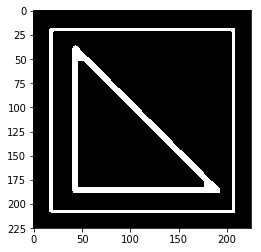

after detecting lines


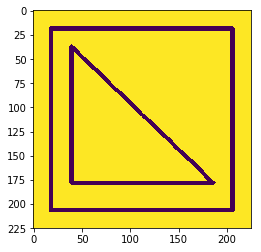

edges before houghlines


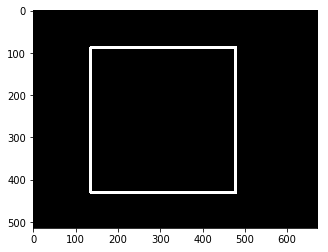

after detecting lines


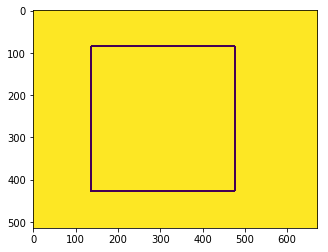

edges before houghlines


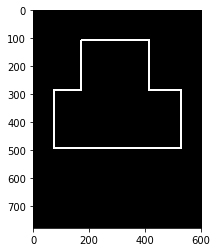

after detecting lines


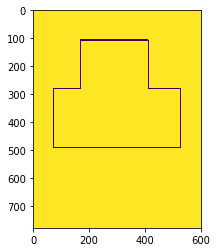

edges before houghlines


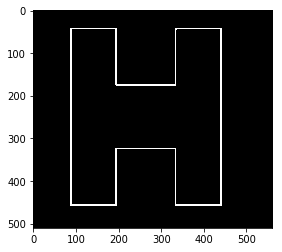

after detecting lines


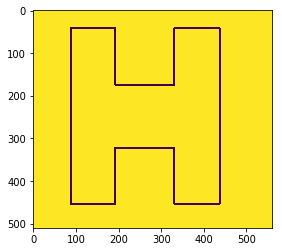

edges before houghlines


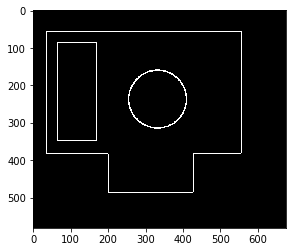

after detecting lines


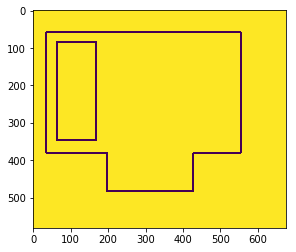

edges before houghlines


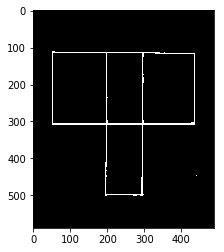

after detecting lines


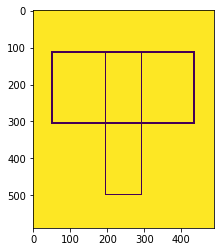

edges before houghlines


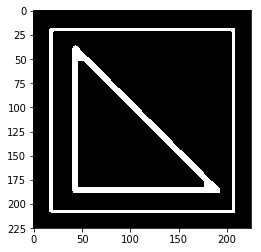

after detecting lines


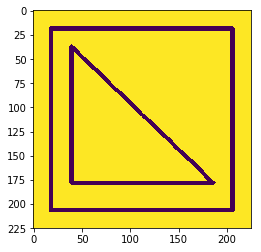

edges before houghlines


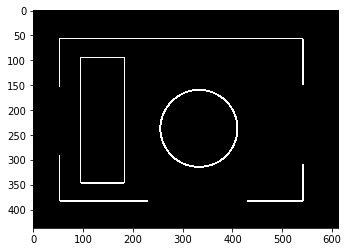

after detecting lines


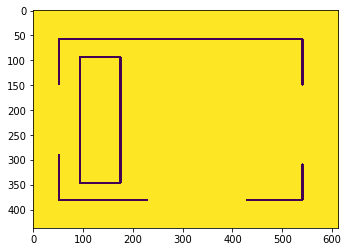

edges before houghlines


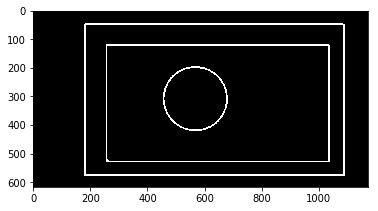

after detecting lines


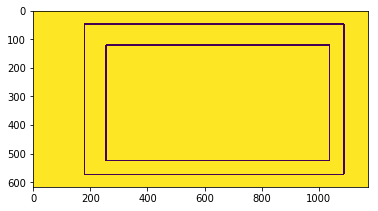

edges before houghlines


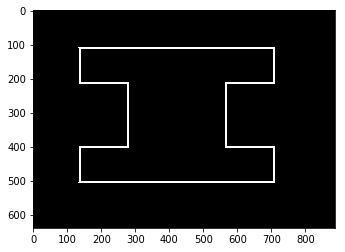

after detecting lines


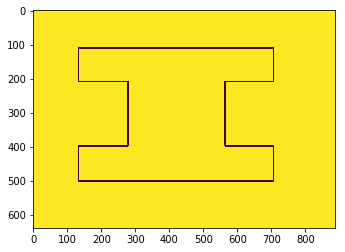

edges before houghlines


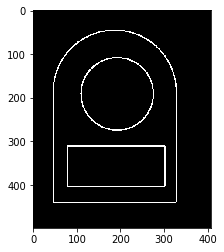

after detecting lines


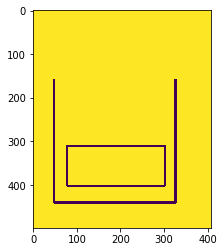

edges before houghlines


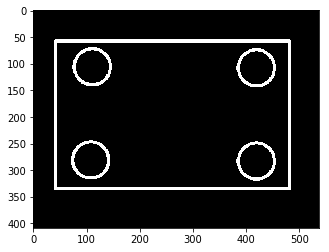

after detecting lines


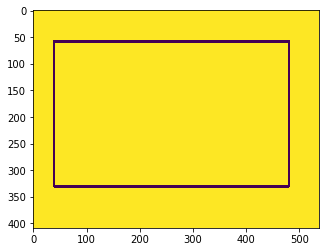

edges before houghlines


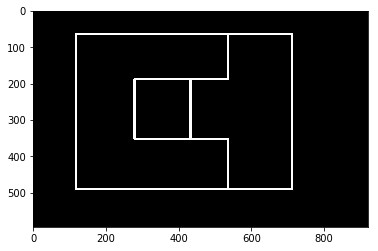

after detecting lines


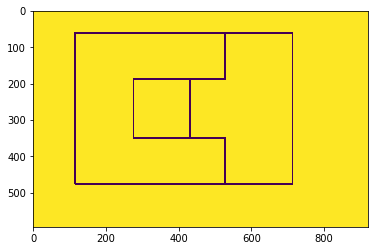

edges before houghlines


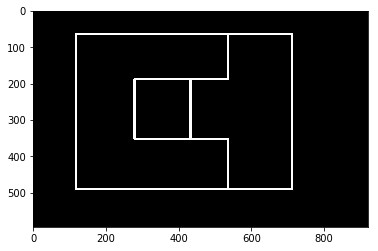

after detecting lines


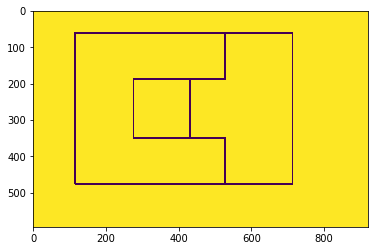

edges before houghlines


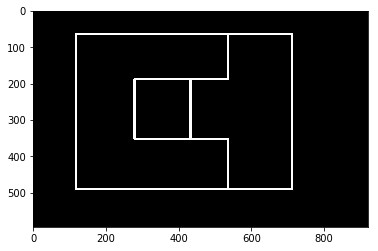

after detecting lines


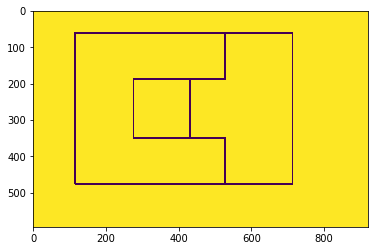

edges before houghlines


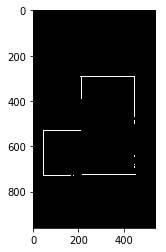

after detecting lines


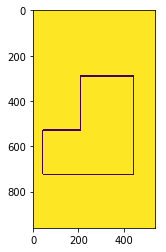

edges before houghlines


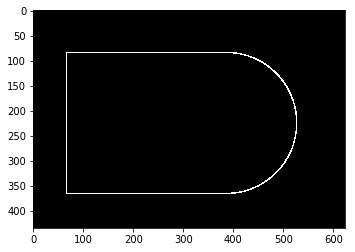

after detecting lines


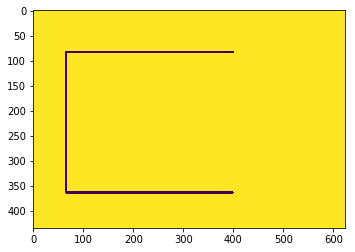

edges before houghlines


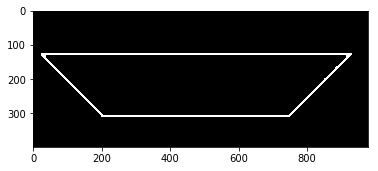

after detecting lines


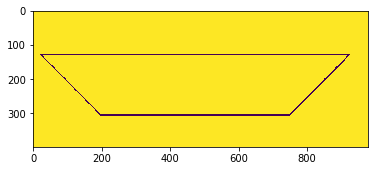

edges before houghlines


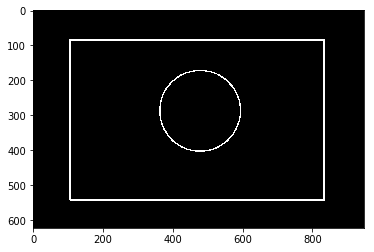

after detecting lines


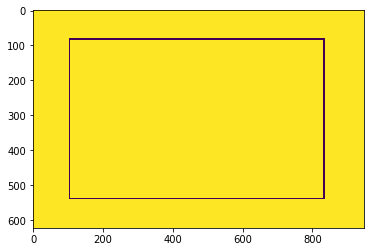

0

In [4]:
import sys
import PySide2
from PySide2 import QtCore, QtGui, QtWidgets
from PySide2.QtWidgets import QApplication, QPushButton, QWidget, QHBoxLayout, QVBoxLayout, QFileDialog, QLineEdit
from PySide2.QtGui import QWindow, QPalette
import random
import math
import os

points_list = []
dimension = 0
distancelist = []


def reset():
    global factor
    global horizontal
    global vertical
    global factor
    global list_circles
    global distancelist
    global points_list
    factor = 1
    horizontal = []
    vertical = []
    general_line = []
    list_circles = []
    distancelist = []
    points_list = []
    
    

def Import_pic():
    reset()
    fileName = QtWidgets.QFileDialog.getOpenFileName()
    pixmap = QtGui.QPixmap(str(fileName[0]))
    label.setPixmap(pixmap)
    label.setAlignment(QtCore.Qt.AlignLeft)
    dimenArea.show()
    dimenLabel.show()
    enterButton.show()
    global name
    name = fileName[0]
    backgroundImage = QtGui.QPixmap("./image10.png")
    backgroundImage.scaled(mainwindow.size(), aspectRatioMode=QtCore.Qt.IgnoreAspectRatio)
    palette = QPalette()
    palette.setBrush(QPalette.Background, backgroundImage)
    mainwindow.setPalette(palette)
    convertButton.setEnabled(False)
    generateFileButton.setEnabled(False)
    filelabel.hide()


def get_distance():
    for i in range(0, len(points_list) - 1, 2):
        x1 = int(points_list[i][0])
        y1 = int(points_list[i][1])
        x2 = int(points_list[i + 1][0])
        y2 = int(points_list[i + 1][1])
        dis = math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
        #     points_list.pop(0)
        #     points_list.pop(1)
        distancelist.append(dis)
    # return dis

def convert_to_autocad():
    try:
        get_distance()
        draw()
        main_prog()
        reset()
        os.startfile(name + ".dxf")
        convertButton.setEnabled(False)
        generateFileButton.setEnabled(False)
    except:
        print('error found, try again')
        convertButton.setEnabled(False)
        generateFileButton.setEnabled(False)
        reset()
    # print(temp)


def generate_file():
    try:
        get_distance()
        draw()
        main_prog()
        reset()
        convertButton.setEnabled(False)
        generateFileButton.setEnabled(False)
        filelabel.show()
    except:
        print('error found')
        convertButton.setEnabled(False)
        generateFileButton.setEnabled(False)
        reset()

def getPos(event):
    x = event.pos().x()
    y = event.pos().y()
    points_list.append((x, y))
    if (clicklabel.text() == "First point selected\nclick on Second point"):
        clicklabel.setText("Second point selected\n Enter dimension ")
    else:
        clicklabel.setText("First point selected\nclick on Second point")
    filelabel.hide()
    clicklabel.show()


def on_enter_button_clicked():
    global dimension
    dimension = int(dimenArea.text())
    dimenArea.clear()
    clicklabel.hide()
    convertButton.setEnabled(True)
    generateFileButton.setEnabled(True)
    # dimenArea.hide()
    # dimenLabel.hide()
    # enterButton.hide()


# Create the Qt Application
app = QApplication(sys.argv)
app.setApplicationName("Converting image to Autocad")

# Create a button
importButton = QPushButton("Import Picture")
convertButton = QPushButton("Draw in Autocad")
generateFileButton = QPushButton("Generate Autocad File")

# Connect the button to the function
importButton.clicked.connect(Import_pic)
importButton.setIcon(QtGui.QIcon("./image3.png"))
convertButton.clicked.connect(convert_to_autocad)
convertButton.setIcon(QtGui.QIcon("./image4.png"))
generateFileButton.clicked.connect(generate_file)
generateFileButton.setIcon(QtGui.QIcon("./image13.png"))

importButton.setStyleSheet('QPushButton {background-color: #FA8072; color: white;border-style: \
outset;border-width: 2px;border-radius: 10px;border-color: beige; font: bold 18px;  min-width: 10em;padding: 6px;}\
QPushButton:hover{background-color:#3CB371;color:black}')
importButton.setFlat(True)
importButton.setFixedSize(62, 42)
convertButton.setStyleSheet('QPushButton {background-color: #6495ED; color:white;border-style: \
outset;border-width: 2px;border-radius: 10px;border-color: beige; font: bold 18px;  min-width: 10em;padding: 6px;} \
QPushButton:disabled{background-color: #696969; color:#C0C0C0} QPushButton:hover{background-color:#3CB371;color:black}')
convertButton.setFixedSize(62, 42)
convertButton.setEnabled(False)
generateFileButton.setStyleSheet('QPushButton {background-color: #6495ED; color:white;border-style: \
outset;border-width: 2px;border-radius: 10px;border-color: beige; font: bold 18px;  min-width: 10em;padding: 6px;}\
QPushButton:disabled{background-color: #696969; color:#C0C0C0} QPushButton:hover{background-color:#3CB371;color:black}')
generateFileButton.setFixedSize(62, 42)
generateFileButton.setEnabled(False)

mainwindow = QWidget()
mainwindow.resize(1000, 800)
buttonslayout = QVBoxLayout()
# button.setIcon(QtGui.QIcon('myImage.jpg'))
buttonslayout.addWidget(importButton)
buttonslayout.addWidget(convertButton)
buttonslayout.addWidget(generateFileButton)

# enter dimensions
dimenArea = QLineEdit()
dimenArea.setStyleSheet(
    "QLineEdit { border: 2px solid #800080;padding: 0 8px; background: #DDA0DD;border-radius: 10px; selection-background-color: darkgray; color:black }")
dimenArea.setFixedSize(72, 32)
dimenArea.hide()
# enter dimension label
dimenLabel = QtWidgets.QLabel("Click on two points with the mouse then Enter a Dimension")
dimenLabel.setStyleSheet("QLabel{font:bold 18px;color:#6A5ACD}")
dimenLabel.hide()
# dimension enter
enterButton = QPushButton("Enter")
enterButton.setFixedSize(100, 32)
enterButton.setStyleSheet("QPushButton{border-radius: 10px;background: #C71585; font:bold 16px;color: white;}")
enterButton.hide()
enterButton.clicked.connect(on_enter_button_clicked)
# click flag
clicklabel = QtWidgets.QLabel()
clicklabel.setFixedSize(220, 150)
clicklabel.setStyleSheet("QLabel{font:bold 19px;color:#228B22}")
clicklabel.hide()
# file generated flag
filelabel = QtWidgets.QLabel("File Generated")
filelabel.setFixedSize(300, 200)
filelabel.setStyleSheet("QLabel{font:bold 26px;color:#228B22}")
filelabel.hide()

buttonslayout.addWidget(clicklabel)
buttonslayout.addWidget(filelabel)
buttonslayout.addStretch(2)

# pixmap = QtGui.QPixmap(fileName)
label = QtWidgets.QLabel()
label.mousePressEvent = getPos

# textArea and enter layout
lineLayout = QHBoxLayout()
lineLayout.addWidget(dimenArea)
lineLayout.addWidget(enterButton)
lineLayout.addStretch(2)

# Dimensions and image Layout
DimenLayout = QVBoxLayout()
DimenLayout.addWidget(label)
DimenLayout.addWidget(dimenLabel)
DimenLayout.addLayout(lineLayout, 2)
# DimenLayout.addWidget(clicklabel)
DimenLayout.addStretch(2)

# label.setPixmap(pixmap)

mainlayout = QHBoxLayout()
mainlayout.addLayout(buttonslayout, 2)
mainlayout.addLayout(DimenLayout)

mainwindow.setLayout(mainlayout)
# mainwindow.setStyleSheet("QWidget { background-color: #404040 }")
backgroundImage = QtGui.QPixmap("./image12.png")
# #backgroundImage.setSize(1000, 800)
backgroundImage.scaled(mainwindow.size(), aspectRatioMode=QtCore.Qt.IgnoreAspectRatio)
palette = QPalette()
palette.setBrush(QPalette.Background, backgroundImage)
mainwindow.setPalette(palette)
# mainwindow.setAutoFillBackground(True)
# mainwindow.setStyleSheet("QWidget { background-color: white }")

mainwindow.show()
# Run the main Qt loop
app.exec_()

In [5]:

dimension

10

In [6]:
factor

1

In [7]:
# class MyWidget(QtWidgets.QWidget):
#     def __init__(self):
#         super().__init__()

#         #self.hello = ["Hallo Welt", "Hei maailma", "Hola Mundo", "Привет мир"]

#         self.button = QtWidgets.QPushButton("Click me!")
#         fileName="C:/Users/HP/Desktop/ImageGUI/icons8-edit-500.png"
#         pixmap = QtGui.QPixmap(fileName)
    
#         self.text = QtWidgets.QLabel()
#         self.text.setPixmap(pixmap)
        
#         #self.text.setAlignment(QtCore.Qt.AlignCenter)

#         self.layout = QtWidgets.QVBoxLayout()
#         self.layout.addWidget(self.text)
#         self.layout.addWidget(self.button)
#         self.setLayout(self.layout)

#         self.button.clicked.connect(self.magic)


#     def magic(self):
#         #self.text.setText(random.choice(self.hello))
#         fileName = QtWidgets.QFileDialog.getOpenFileName()
#         print(fileName[0])
#         pixmap = QtGui.QPixmap(str(fileName[0]))
#         self.text.setPixmap(pixmap)
#         self.text.show()
#         self.update()
        


In [8]:
# app = QtWidgets.QApplication([])

# widget = MyWidget()
# widget.resize(800, 600)
# widget.show()

# sys.exit(app.exec_())

In [9]:
dimension

10

In [10]:
img = cv2.imread('./image11.png', cv2.IMREAD_UNCHANGED)
dim = [1280, 850]

resized = cv2.resize(img, (1920, 1000))
cv2.imwrite('image12.png', resized)


temp=name.split('.')[0]

error: OpenCV(3.4.3) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
